# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [83]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [84]:
#On importe les données dans un dataframe
df_paris = pd.read_excel("historique_immobilier_paris_2017_2021_vdef2.xlsx")
df_actifs = pd.read_excel("portefeuille_actifs+(3).xlsx")

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [85]:
#On vérifie que le type des données attribué par pandas est cohérent
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


In [86]:
df_actifs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


In [87]:
df_paris.describe()

,date_mutation,valeur_fonciere,adresse_numero,code_postal,code_type_local,surface_reelle
count,26196,2.619600e+04,26196.000000,26196.000000,26196.000000,26196.000000
mean,2019-06-09 14:09:14.099862784,4.916170e+05,47.449572,75012.716216,2.140709,46.859940
min,2017-01-02 00:00:00,8.519470e+04,1.000000,75001.000000,2.000000,11.000000
25%,2018-03-14 00:00:00,2.339439e+05,10.000000,75009.000000,2.000000,23.000000
50%,2019-05-23 00:00:00,3.545774e+05,27.000000,75014.000000,2.000000,35.000000
75%,2020-09-16 00:00:00,5.702197e+05,63.000000,75017.000000,2.000000,55.000000
max,2021-12-31 00:00:00,3.843359e+07,407.000000,75020.000000,4.000000,3945.000000
std,NaN,5.713292e+05,55.733432,5.269150,0.511496,52.408062


In [88]:
def analyste_table(table):
    detection = {}

    print("\n Informations générales sur la table :\n")
    print(table.info())

    print("\n Statistiques descriptives pour les colonnes numériques :\n")
    print(table.describe())

    # Valeurs manquantes
    valeurs_manquantes = table.isnull().sum()
    detection['Valeurs manquantes'] = valeurs_manquantes[valeurs_manquantes > 0]
    print("\n Valeurs manquantes :")
    print(detection['Valeurs manquantes'])

    # Doublons
    doublons = table.duplicated().sum()
    detection['Nb de doublons'] = doublons
    print(f"\n Nombre de doublons : {doublons}")

    # Value_counts() pour colonnes de type texte
    colonne_texte = table.select_dtypes(include='object')
    detection["Value_counts"] = {}
    for col in colonne_texte.columns:
        detection["Value_counts"][col] = table[col].value_counts()
        print(f"\nValue_counts pour '{col}' :\n", table[col].value_counts())

    #détection des outliers :
    colonnes_numeriques = table.select_dtypes(include=['number'])
    for col in colonnes_numeriques.columns:
        mediane_q2 = colonnes_numeriques[col].median()
        print(f"\n Analyse de la colonne '{col}':")
        print(f"\n Médiane (Q2) : {mediane_q2}")

        ligne_q1 = colonnes_numeriques[col][colonnes_numeriques[col] < mediane_q2]
        mediane_q1 = ligne_q1.median()
        print(f"\n Médiane de Q1 : {mediane_q1}")

        ligne_q3 = colonnes_numeriques[col][colonnes_numeriques[col] > mediane_q2]
        mediane_q3 = ligne_q3.median()
        print(f"\n Médiane de Q3 : {mediane_q3}")

        iqr_col = mediane_q3 - mediane_q1
        print(f"\n IQR : {round(iqr_col, 2)}")

        # Sélection des lignes où la valeur est supérieure à l'IQR
        valeurs_sup_iqr = table[table[col] > iqr_col]

        print(f"\n Nombre de valeurs supérieures à l'IQR de la colonne {col}: {valeurs_sup_iqr.shape[0]}")
        
        # Sauvegarde des lignes dans le dictionnaire
        detection[col] = valeurs_sup_iqr

    return detection

In [89]:
analyste_table(df_paris)


 Informations générales sur la table :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB
None

 Statistiques descriptives pour les colonnes numériques :

                       date_mutation  valeur_fonciere  adresse_numero  \
count                          26196  

{'Valeurs manquantes': Series([], dtype: int64),
 'Nb de doublons': 16,
 'Value_counts': {'adresse_nom_voie': adresse_nom_voie
  RUE DE VAUGIRARD              137
  RUE DES PYRENEES              123
  RUE DE CHARENTON              117
  RUE DU FBG ST MARTIN          114
  RUE SAINT MAUR                110
                               ... 
  RUE DES DEUX AVENUES            1
  AV BEAUCOUR                     1
  RUE DE L ECOLE DE MEDECINE      1
  RUE LAHIRE                      1
  RUE GRETRY                      1
  Name: count, Length: 2874, dtype: int64,
  'nom_commune': nom_commune
  Paris 18e Arrondissement    2925
  Paris 15e Arrondissement    2453
  Paris 17e Arrondissement    2363
  Paris 16e Arrondissement    2104
  Paris 11e Arrondissement    2066
  Paris 20e Arrondissement    1585
  Paris 14e Arrondissement    1329
  Paris 10e Arrondissement    1327
  Paris 19e Arrondissement    1129
  Paris 12e Arrondissement    1107
  Paris 9e Arrondissement     1088
  Paris 13e Arrondis

In [90]:
# Il m'indique qu'il y aurait 16 doublons dans la table, alos on vérifie si c'est le cas :
df_paris[df_paris.duplicated()]
#Ce n'est pas le cas donc on garde ces lignes.

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
209,2017-05-18,246703.319425,400,RUE SAINT HONORE,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,19
376,2017-10-17,855144.863014,71,RUE D AMSTERDAM,75008,Paris 8e Arrondissement,2,Appartement,82
1063,2017-12-28,148485.376712,6,RUE BLAINVILLE,75005,Paris 5e Arrondissement,2,Appartement,13
2775,2017-01-04,885116.628219,8,RUE PAUL HERVIEU,75015,Paris 15e Arrondissement,2,Appartement,98
3436,2017-05-16,108677.313288,7,RUE DOCTEUR GERMAIN SEE,75016,Paris 16e Arrondissement,2,Appartement,11
4756,2017-12-20,132855.435616,18,RUE SIMART,75018,Paris 18e Arrondissement,2,Appartement,15
11239,2019-07-12,225856.479452,17,BD SAINT MARTIN,75003,Paris 3e Arrondissement,2,Appartement,18
12066,2019-03-14,109796.610000,14,RUE DE LANCRY,75010,Paris 10e Arrondissement,2,Appartement,11
12296,2019-09-27,162888.441781,5,RUE PIERRE FONTAINE,75009,Paris 9e Arrondissement,2,Appartement,15
14478,2019-09-25,931045.625342,15,RUE RAYNOUARD,75016,Paris 16e Arrondissement,2,Appartement,85


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [91]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est ?:', df_actifs[['type_local', 'code_type_local']].value_counts(), df_paris[['type_local', 'code_type_local']].value_counts())


la liste des différents types de biens immobiliers que nous avons dans les données est ?: type_local                                code_type_local
Appartement                               2                  154
Local industriel. commercial ou assimilé  4                  121
Name: count, dtype: int64 type_local                                code_type_local
Appartement                               2                  24353
Local industriel. commercial ou assimilé  4                   1843
Name: count, dtype: int64


On observe qu'il y a 2 types de biens, et que leurs codes types sont '2' pour les appartements et '4' pour les locaux industriels/commerciaux/assimilés. 

### 3. Nombre de transactions

In [92]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est de', df_paris['date_mutation'].count())
print('le nombre de transactions pour les appartements dans les données est de', df_paris[df_paris['type_local'] == 'Appartement']['date_mutation'].count())
print('le nombre de transactions pour les locaux commerciaux dans les données est de', df_paris[df_paris['code_type_local'] == 4]['date_mutation'].count())

le nombre de transactions dans les données est de 26196
le nombre de transactions pour les appartements dans les données est de 24353
le nombre de transactions pour les locaux commerciaux dans les données est de 1843


### 4. interval de l'historique des données

In [93]:
#On vérifie également la plage de l'historique disponible
print('la première date de transaction dans les données est le', df_paris['date_mutation'].min())
print('la dernière date de transaction dans les données est le ?', df_paris['date_mutation'].max())

la première date de transaction dans les données est le 2017-01-02 00:00:00
la dernière date de transaction dans les données est le ? 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [94]:
# Calcul de la colonne
df_paris['prix_m2'] = round(df_paris['valeur_fonciere'] / df_paris['surface_reelle'],2)
df_paris

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11
...,...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,75004,Paris 4e Arrondissement,2,Appartement,37,12735.78
26192,2021-02-17,1.982330e+06,23,RUE DU SENTIER,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,150,13215.54
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,75002,Paris 2e Arrondissement,2,Appartement,26,12016.77
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,75002,Paris 2e Arrondissement,2,Appartement,13,12017.18


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [95]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_paris_appartement = df_paris[df_paris['code_type_local'] == 2]

In [96]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
## 1) création d'une colonne 'annee'
df_paris_appartement['annee'] = df_paris['date_mutation'].dt.year
df_paris_appartement

C:\Users\simon\AppData\Local\Temp\ipykernel_15920\477042674.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2,annee
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19,2017
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73,2017
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02,2017
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58,2017
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11,2017
...,...,...,...,...,...,...,...,...,...,...,...
26189,2021-02-24,8.489150e+05,3,RUE DE BIRAGUE,75004,Paris 4e Arrondissement,2,Appartement,66,12862.35,2021
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,75004,Paris 4e Arrondissement,2,Appartement,37,12735.78,2021
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,75002,Paris 2e Arrondissement,2,Appartement,26,12016.77,2021
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,75002,Paris 2e Arrondissement,2,Appartement,13,12017.18,2021


In [97]:
## 2) création du pivot table
df_paris_appartement_pivot_annee = pd.pivot_table(df_paris_appartement, index='annee', values=['valeur_fonciere', 'surface_reelle'], aggfunc='mean').round(2)
df_paris_appartement_pivot_annee

,surface_reelle,valeur_fonciere
annee,,
2017,44.63,427963.24
2018,44.27,448055.76
2019,43.36,461950.06
2020,42.90,462383.25
2021,43.48,458771.51


On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>
Nous allons créer un graphique pour mieux le visualiser.

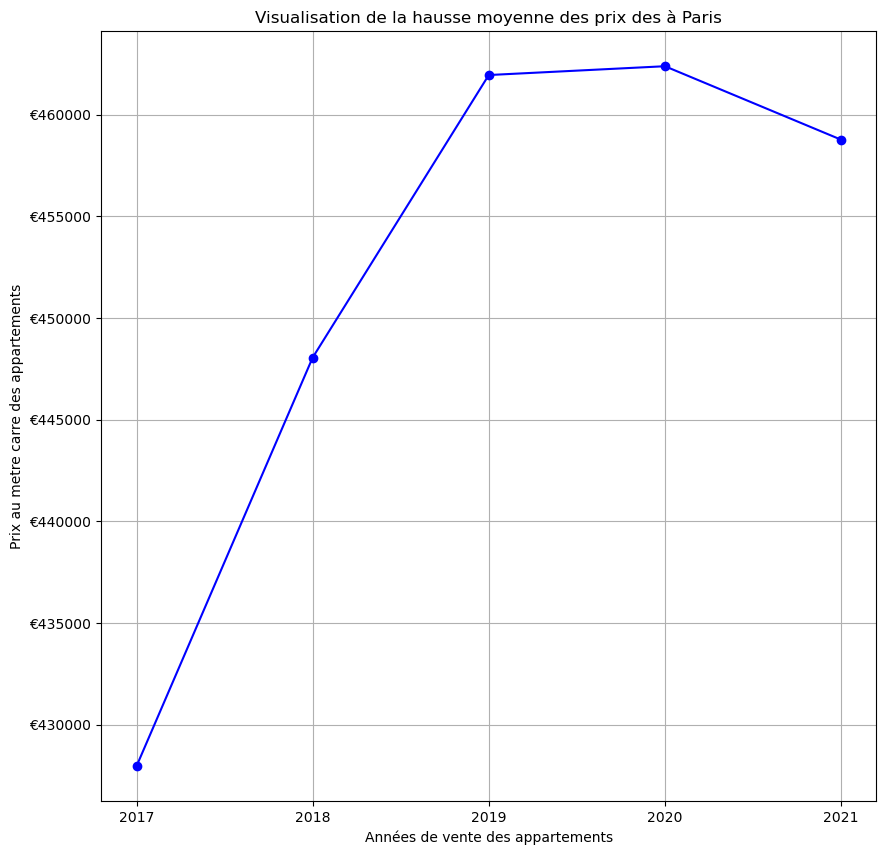

In [98]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,10))
plt.plot(df_paris_appartement_pivot_annee.index.astype(str), df_paris_appartement_pivot_annee['valeur_fonciere'], marker='o', color='blue') # .index.astype(str) évite d'avoir des valeurs comme 2017.5 ou 2018.5 (car à la base ils sont en format int32)
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [99]:
#Liste des codes postaux dans nos données.
print(df_paris_appartement['nom_commune'].value_counts())

print(df_paris_appartement['nom_commune'].nunique())

nom_commune
Paris 18e Arrondissement    2805
Paris 15e Arrondissement    2308
Paris 17e Arrondissement    2212
Paris 16e Arrondissement    1947
Paris 11e Arrondissement    1932
Paris 20e Arrondissement    1528
Paris 14e Arrondissement    1248
Paris 10e Arrondissement    1227
Paris 19e Arrondissement    1091
Paris 12e Arrondissement    1036
Paris 9e Arrondissement      969
Paris 13e Arrondissement     870
Paris 5e Arrondissement      829
Paris 3e Arrondissement      784
Paris 6e Arrondissement      709
Paris 2e Arrondissement      666
Paris 8e Arrondissement      628
Paris 7e Arrondissement      607
Paris 4e Arrondissement      548
Paris 1er Arrondissement     409
Name: count, dtype: int64
20


In [100]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df_paris_appartement_pivot_arr = pd.pivot_table(df_paris_appartement, index='nom_commune', values=['valeur_fonciere'], aggfunc='mean').round(2)
display(df_paris_appartement_pivot_arr)
df_paris_appartement_pivot_arr2 = pd.pivot_table(df_paris_appartement, index='nom_commune', columns= 'annee', values=['valeur_fonciere'], aggfunc='mean').round(2)
display(df_paris_appartement_pivot_arr2)

,valeur_fonciere
nom_commune,
Paris 10e Arrondissement,388866.27
Paris 11e Arrondissement,364381.18
Paris 12e Arrondissement,369521.52
Paris 13e Arrondissement,330892.87
Paris 14e Arrondissement,392738.99
Paris 15e Arrondissement,397676.14
Paris 16e Arrondissement,716756.55
Paris 17e Arrondissement,466379.34
Paris 18e Arrondissement,351986.09


valeur_fonciere                                   \
annee                               2017       2018       2019       2020   
nom_commune                                                                 
Paris 10e Arrondissement       357132.74  398706.06  389450.39  407332.23   
Paris 11e Arrondissement       342397.02  344785.56  372932.21  381312.56   
Paris 12e Arrondissement       322781.84  393729.84  367727.15  398641.38   
Paris 13e Arrondissement       292999.24  319388.18  365771.03  351202.30   
Paris 14e Arrondissement       389059.62  392581.11  363971.46  412613.72   
Paris 15e Arrondissement       399610.89  370968.31  394937.42  414124.48   
Paris 16e Arrondissement       681941.77  703705.23  747017.01  721728.76   
Paris 17e Arrondissement       431647.99  459019.62  491695.29  462766.87   
Paris 18e Arrondissement       302471.12  344396.78  374311.13  372035.69   
Paris 19e Arrondissement       287983.75  319654.45  339489.57  329039.15   
Paris 1er Arrondissement       530392.41  581390.37  454606.24  601204.89   
Paris 20e Arrondissement       313979.41  316909.31  322005.37  316868.86   
Paris 2e Arrondissement        470308.38  411782.83  482756.60  481732.58   
Paris 3e Arrondissement        445875.08  515538.31  554133.09  555395.40   
Paris 4e Arrondissement        507122.25  555545.31  627199.80  605801.58   
Paris 5e Arrondissement        440921.99  454114.99  487728.95  420616.19   
Paris 6e Arrondissement        582541.65  690174.51  677444.41  755259.93   
Paris 7e Arrondissement        745605.08  707752.33  674806.71  745561.63   
Paris 8e Arrondissement        707016.40  698295.01  775888.33  760612.85   
Paris 9e Arrondissement        457244.89  460802.41  493540.96  516759.51   

                                     
annee                          2021  
nom_commune                          
Paris 10e Arrondissement  396104.53  
Paris 11e Arrondissement  386920.08  
Paris 12e Arrondissement  378092.25  
Paris 13e Arrondissement  327517.33  
Paris 14e Arrondissement  409544.07  
Paris 15e Arrondissement  412553.34  
Paris 16e Arrondissement  732964.14  
Paris 17e Arrondissement  485246.57  
Paris 18e Arrondissement  364055.85  
Paris 19e Arrondissement  337972.96  
Paris 1er Arrondissement  639321.08  
Paris 20e Arrondissement  340528.71  
Paris 2e Arrondissement   457519.16  
Paris 3e Arrondissement   511715.57  
Paris 4e Arrondissement   564595.12  
Paris 5e Arrondissement   499492.77  
Paris 6e Arrondissement   709572.17  
Paris 7e Arrondissement   735736.29  
Paris 8e Arrondissement   721599.12  
Paris 9e Arrondissement   491604.86

In [101]:
df_paris_1er_arrondissement = df_paris_appartement[df_paris_appartement['nom_commune'] == 'Paris 1er Arrondissement']

pd.pivot_table(df_paris_1er_arrondissement, index='annee', values=['valeur_fonciere'], aggfunc='mean').round(2)

,valeur_fonciere
annee,
2017,530392.41
2018,581390.37
2019,454606.24
2020,601204.89
2021,639321.08


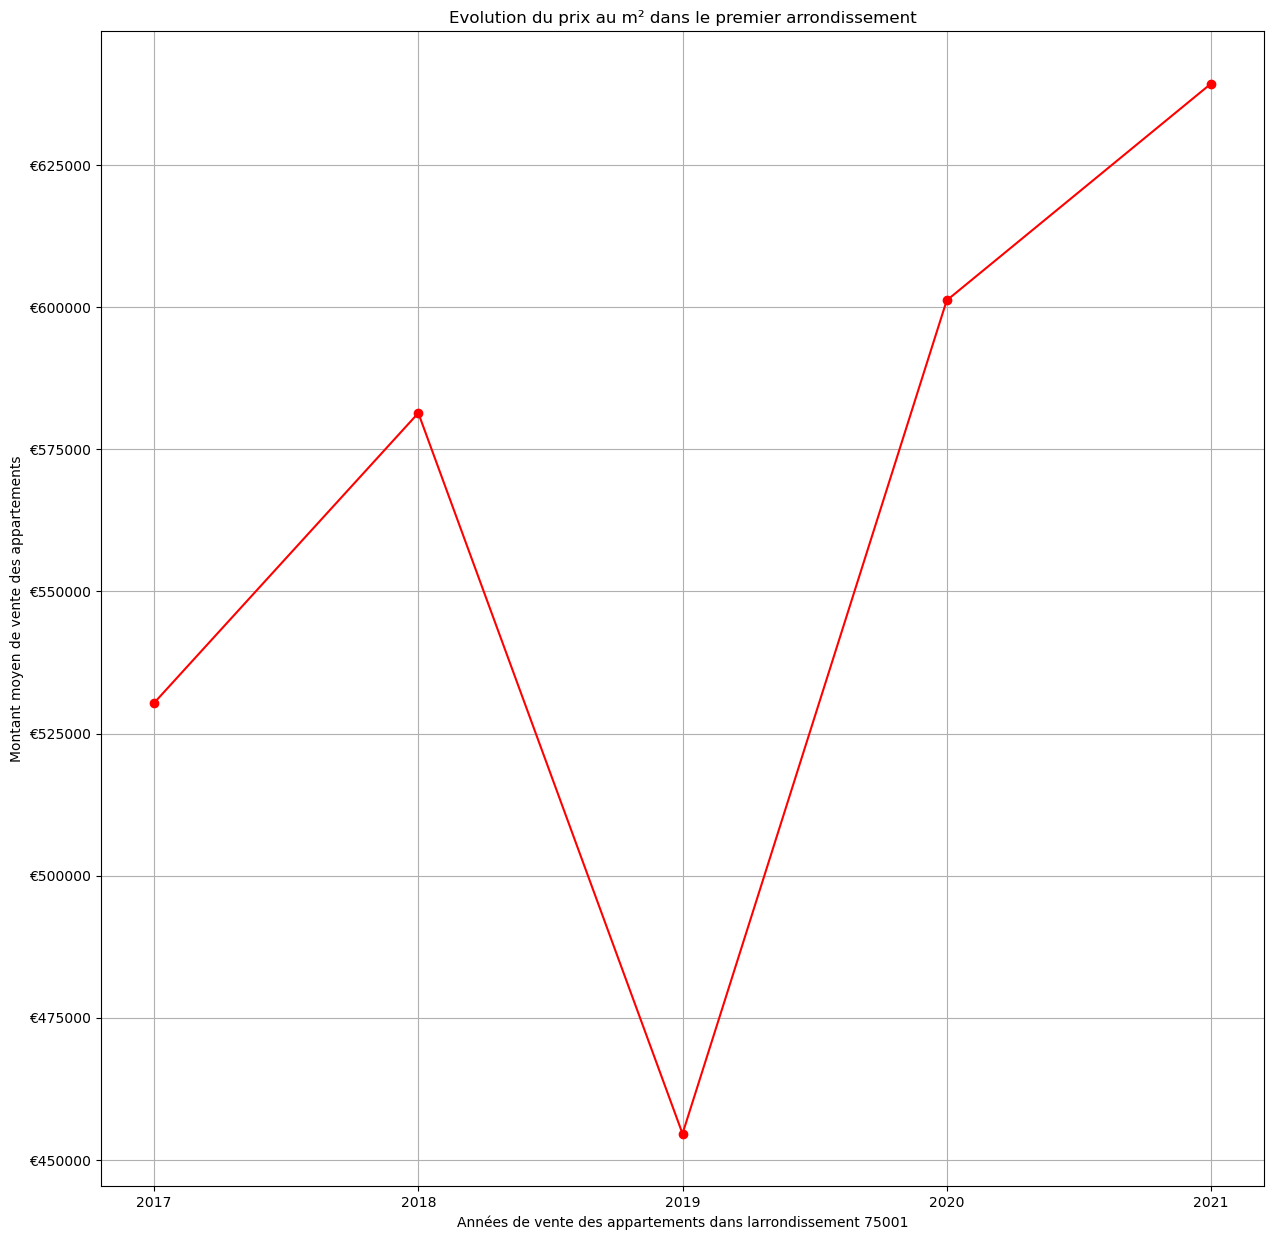

In [102]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement

## Création d'un df pour le 1er Arrondissement
df_paris_1er_arrondissement = df_paris_appartement[df_paris_appartement['nom_commune'] == 'Paris 1er Arrondissement']

df_paris_1er_arrondissement_pivot = pd.pivot_table(df_paris_1er_arrondissement, index='annee', values=['valeur_fonciere'], aggfunc='mean').round(2)

plt.figure(figsize=(15,15))
plt.plot(df_paris_1er_arrondissement_pivot.index.astype(str), df_paris_1er_arrondissement_pivot['valeur_fonciere'], marker='o', color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

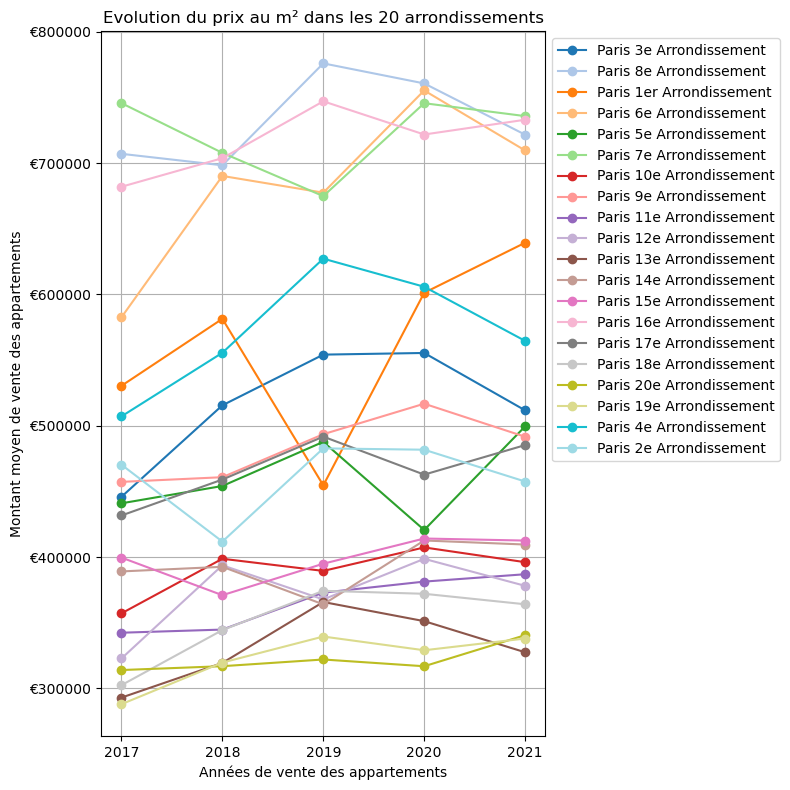

In [103]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(8,8))
interval_historique=['2017','2018','2019','2020','2021']
#Insérer les lignes à tracer ci-dessous

arrondissements = df_paris_appartement['nom_commune'].unique()
from itertools import cycle
colors = cycle(plt.cm.tab20.colors)

for arrondissement in arrondissements:
    # Créer un df pour chaque arrondissement
    df_arrondissement = df_paris_appartement[df_paris_appartement['nom_commune'] == arrondissement]
    
    # Créer une pivot_table pour chaque arrondissement
    arrondissement_pivot = pd.pivot_table(df_arrondissement, 
                                          index='annee', 
                                          values='valeur_fonciere', 
                                          aggfunc='mean').round(2)
    
    # Créer 1 graphique pour tous les arrondissements
    plt.plot(arrondissement_pivot.index.astype(str), arrondissement_pivot['valeur_fonciere'], marker='o', label=arrondissement, color = next(colors))


plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

On observe globalement que les prix augmentent quelque soit l'arrondissement.
Le 7e arrondissement à la valeur fonciere la plus élevé.
Le 6e arrondissement semble être l'arrondissement qui connait la plus grande hausse.

### 7. Prix au metre carré par transaction dans un arrondissement

In [104]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
df_paris_appartement[df_paris_appartement['nom_commune'] == 'Paris 6e Arrondissement']['date_mutation'].count()

709

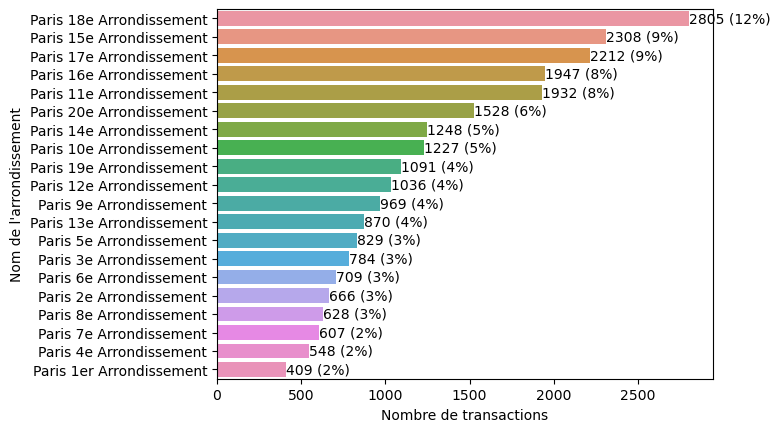

In [105]:
ax = sns.countplot(
    y=df_paris_appartement['nom_commune'],
    order=df_paris_appartement['nom_commune'].value_counts().index
)
        
valeur_absolue = df_paris_appartement['nom_commune'].value_counts(ascending=False)
valeur_relative = df_paris_appartement['nom_commune'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(valeur_absolue, valeur_relative)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.xlabel('Nombre de transactions')
plt.ylabel("Nom de l'arrondissement")
plt.show()

On constate que le 6 arrondissement n'est pas l'arrondissement où il y a le plus de transaction. C'est le 18e arrondissement où il y en a le plus avec 2805 transactions.

Affichons l'historique des transactions pour visualiser la dispersion des données :

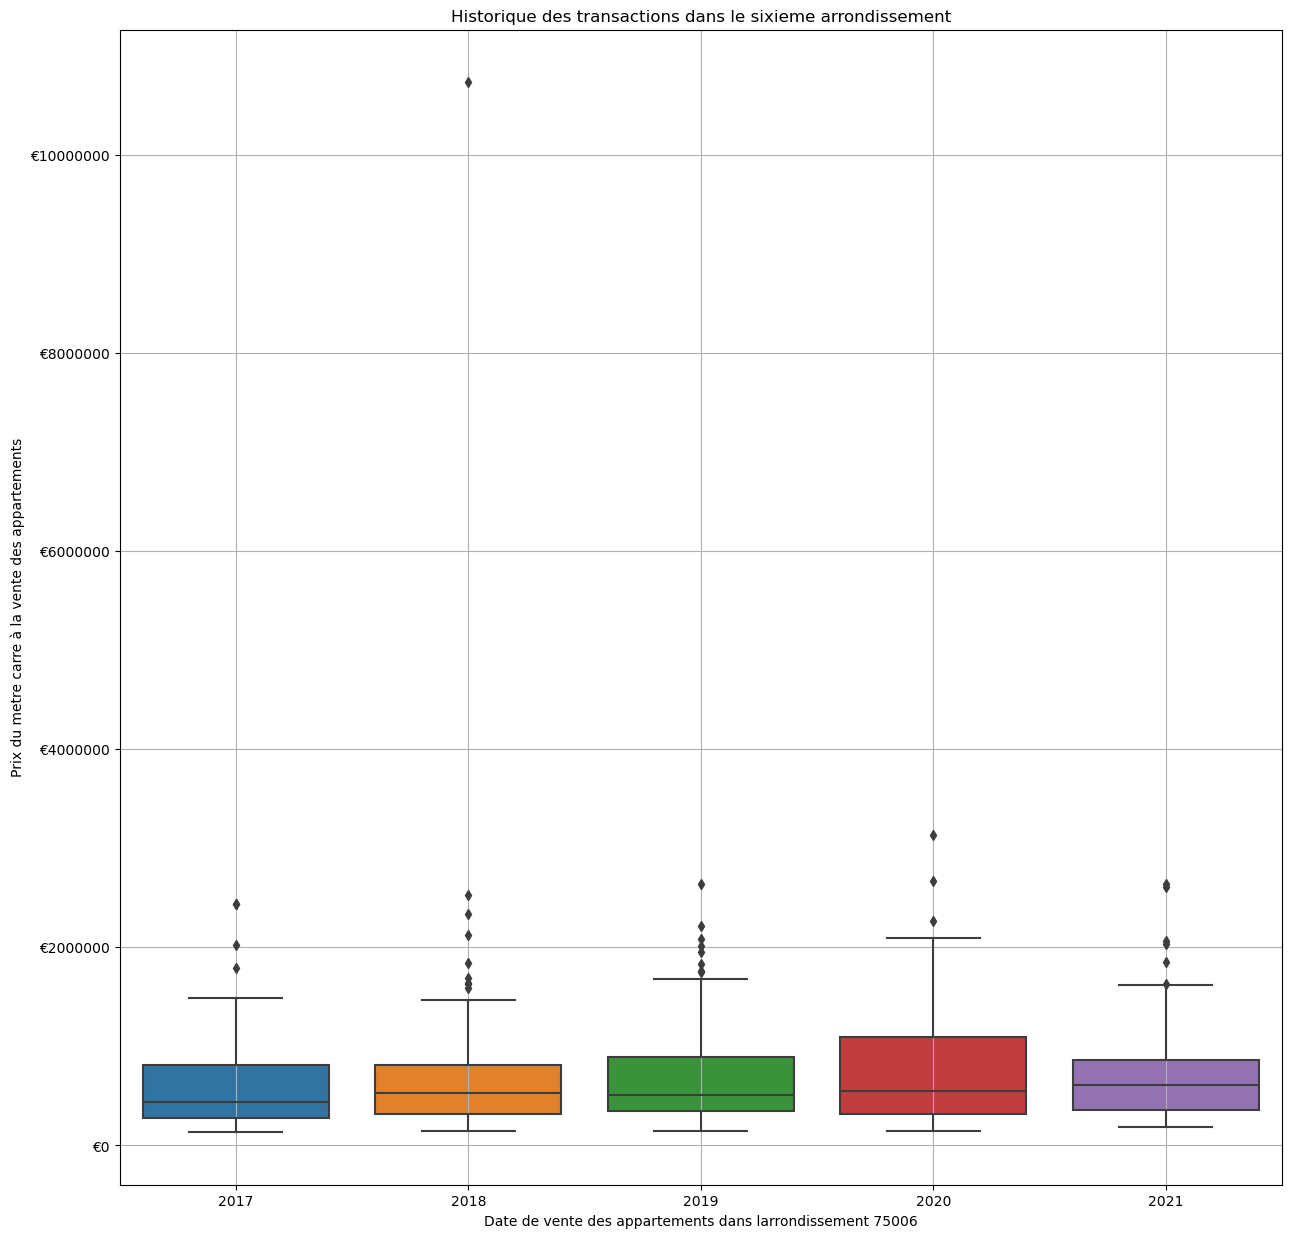

In [106]:
## Création d'un df pour le 6e Arrondissement
df_paris_6e_arrondissement = df_paris_appartement[df_paris_appartement['nom_commune'] == 'Paris 6e Arrondissement']

plt.figure(figsize=(15,15))
#Insérer ci-dessous le scatter plot
sns.boxplot(
    data = df_paris_6e_arrondissement,
    x = 'annee',
    y = 'valeur_fonciere',
)
plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.autoscale()
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe que que les prix augmentent au fur et à mesure des années. Il y a eu une vente importante en 2018.

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [107]:
#On calcule la corrélation de Pearson
from scipy import stats
correlation, p_value = stats.pearsonr(df_paris_6e_arrondissement['annee'], df_paris_6e_arrondissement['valeur_fonciere'])
print(round(correlation,2))
print(p_value)


0.08
0.031045055228087627


Le coefficient de corrélation est de 0,08 avec une pvalue de 0,0031 donc il semble que la relation entre l'année et la valeur fonciere soit une relation légèrement croissante (+0.11) et significative (car p-value < 0.05)

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [108]:
correlation2, p_value2 = stats.pearsonr(df_paris['surface_reelle'], df_paris['valeur_fonciere'])
print(round(correlation2,2))
print(p_value2)

0.98
0.0


Le coefficient de corrélation est de 0,98 avec une pvalue de 0.0. La relation est donc confirmée car il semble que la relation entre la surface réelle et la valeur fonciere soit une relation parfaitement croissante (0,98) et significative (car p-value < 0.05)

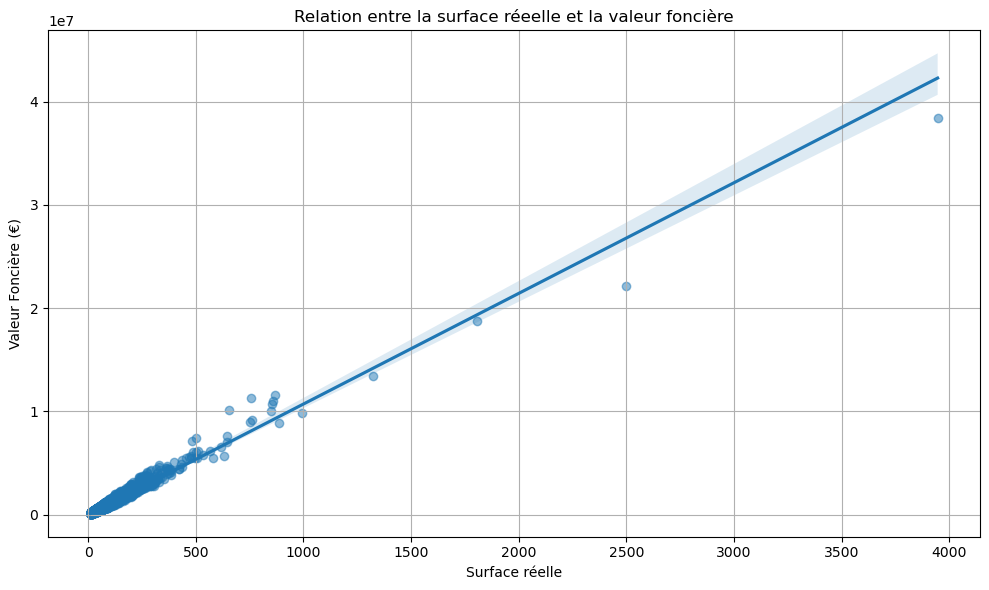

In [109]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_paris,
    x='surface_reelle',
    y='valeur_fonciere',
    scatter_kws={'alpha': 0.5}
    )

plt.title('Relation entre la surface réeelle et la valeur foncière')
plt.xlabel('Surface réelle')
plt.ylabel('Valeur Foncière (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

In [110]:
df_paris['code_type_local'].value_counts()

code_type_local
2    24353
4     1843
Name: count, dtype: int64

In [111]:
correlation3, p_value3 = stats.spearmanr(df_paris['code_type_local'], df_paris['prix_m2'])
print(round(correlation3,2))
print(p_value3)

0.25
0.0


### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [112]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_paris_commerce = df_paris[df_paris['code_type_local'] == 4]
df_paris_commerce['annee'] = df_paris_commerce['date_mutation'].dt.year
df_paris_commerce

C:\Users\simon\AppData\Local\Temp\ipykernel_15920\1255829767.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2,annee
18,2017-02-01,3.113277e+06,65,RUE DE TURBIGO,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,250,12453.11,2017
29,2017-02-17,1.164375e+06,17,RUE DU PONT AUX CHOUX,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,95,12256.58,2017
34,2017-02-20,3.802522e+05,10,RUE CAFFARELLI,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,31,12266.20,2017
91,2017-03-09,3.623842e+05,33,RUE DE RICHELIEU,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,29,12496.01,2017
109,2017-03-29,3.159072e+05,130,RUE VIEILLE DU TEMPLE,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,25,12636.29,2017
...,...,...,...,...,...,...,...,...,...,...,...
26149,2021-01-13,1.903438e+05,3,RUE SAINT-JOSEPH,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,15,12689.58,2021
26164,2021-01-26,4.487582e+05,2,RUE GRETRY,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,35,12821.66,2021
26166,2021-01-13,6.409217e+05,115,RUE D ABOUKIR,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,49,13080.03,2021
26190,2021-02-26,5.131939e+05,16,RUE AUBRIOT,75004,Paris 4e Arrondissement,4,Local industriel. commercial ou assimilé,37,13870.11,2021


In [113]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
df_paris_commerce_pivot_annee = pd.pivot_table(df_paris_commerce, index='annee', values=['prix_m2'], aggfunc='mean').round(2)
df_paris_commerce_pivot_annee

,prix_m2
annee,
2017,10949.91
2018,11569.50
2019,11960.13
2020,11966.47
2021,12006.49


In [114]:
df_paris_app_annee_m2 = pd.pivot_table(df_paris_appartement, index='annee', values=['prix_m2'], aggfunc='mean').round(2)
df_paris_app_annee_m2

,prix_m2
annee,
2017,9492.86
2018,10031.40
2019,10562.71
2020,10674.87
2021,10455.60


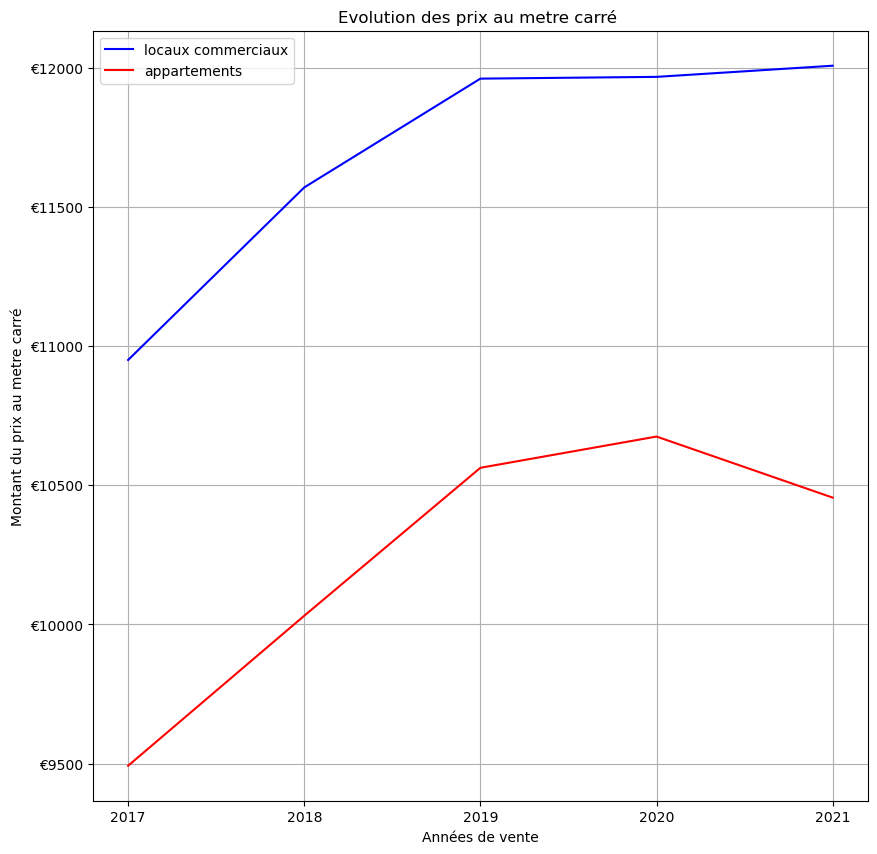

In [115]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(df_paris_commerce_pivot_annee.index.astype(str), df_paris_commerce_pivot_annee.values, label='locaux commerciaux', color='blue')
plt.plot(df_paris_app_annee_m2.index.astype(str), df_paris_app_annee_m2.values, label='appartements', color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.autoscale()
plt.show()

Le prix au metre carré des locaux commerciaux est croissant entre 2017 et 2021. Cette croissance atteint son pic en 2021 où le prix au m² est de plus de 12 006,49€.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [116]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
 9   prix_m2           26196 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 2.0+ MB


In [117]:
df_paris_ml = df_paris.loc[:,['valeur_fonciere', 'code_postal', 'code_type_local', 'surface_reelle', 'date_mutation']]
df_paris_ml['year'] = df_paris_ml['date_mutation'].dt.year        #la colonne 'date_mutation' est de type datetime et le ML ne le prends pas en compte donc création d'une colonne 'year', 'month', 'day'
df_paris_ml['month'] = df_paris_ml['date_mutation'].dt.month
df_paris_ml['day'] = df_paris_ml['date_mutation'].dt.day
df_paris_ml = df_paris_ml.drop(columns=['date_mutation'])

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df_paris_ml.drop("valeur_fonciere", axis=1)
display(X)

y = df_paris_ml["valeur_fonciere"]
display(y)

,code_postal,code_type_local,surface_reelle,year,month,day
0,75003,2,50,2017,1,3
1,75008,2,163,2017,1,12
2,75008,2,66,2017,1,10
3,75003,2,22,2017,1,10
4,75001,2,15,2017,1,13
...,...,...,...,...,...,...
26191,75004,2,37,2021,2,25
26192,75002,4,150,2021,2,17
26193,75002,2,26,2021,3,8
26194,75002,2,13,2021,3,11


0        5.505597e+05
1        1.576492e+06
2        6.577574e+05
3        2.500868e+05
4        1.762667e+05
             ...     
26191    4.712239e+05
26192    1.982330e+06
26193    3.124359e+05
26194    1.562234e+05
26195    3.694294e+05
Name: valeur_fonciere, Length: 26196, dtype: float64

In [119]:
# get_dummies pour créer des colonnes binaires pour savoir si elle appartient ou non à ce code_postal en question
X_dum = pd.get_dummies(X, columns=["code_postal"], dtype=int)
X_dum

,code_type_local,surface_reelle,year,month,day,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,...,code_postal_75011,code_postal_75012,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020
0,2,50,2017,1,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,163,2017,1,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,66,2017,1,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,22,2017,1,10,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,15,2017,1,13,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26191,2,37,2021,2,25,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26192,4,150,2021,2,17,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26193,2,26,2021,3,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26194,2,13,2021,3,11,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [120]:
# On sépare le jeu de données entre echantillons d'apprentissage et de test 
# La valeur y à trouver est la valeur foncière
### Utilisation du TRAIN TEST SPLIT pour SERIE TEMPORELLE : permet de découper les données dans l'ordre du temps (respect de la chronologie des transactions), meilleur prédiction du futur
from sklearn.model_selection import TimeSeriesSplit
# Définir le nombre de splits (par exemple, 4 splits → le dernier sera le test) : 4 = 80/20
tscv = TimeSeriesSplit(n_splits=4)
# Obtenir le dernier split uniquement
for train_index, test_index in tscv.split(X_dum):
    pass  # on passe tous les splits sauf le dernier

# Créer les ensembles d'entraînement et de test
X_train = X_dum.iloc[train_index]
X_test = X_dum.iloc[test_index]
y_train = y.iloc[train_index]
y_test = y.iloc[test_index]


In [121]:
from sklearn.linear_model import LinearRegression
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
modelLR = LinearRegression().fit(X_train, y_train)

In [122]:
## Evaluation du modèle
print('train score LR =', modelLR.score(X_train, y_train))
print('test score LR =', modelLR.score(X_test, y_test))

train score LR = 0.9847841590491266
test score LR = 0.9676765475980561


In [123]:
from sklearn.metrics import mean_absolute_error
y_pred_test = modelLR.predict(X_test)
mean_absolute_error(y_true = y_test, y_pred = y_pred_test)

55353.467453017

Donc en moyenne notre modèle se trompe d'environ 51 998,7€ dans ses prédictions de la valeur foncière par rapport aux données de test.

In [124]:
y_pred_train = modelLR.predict(X_train)
mean_absolute_error(y_true = y_train, y_pred = y_pred_train)

31847.044647433555

In [125]:
#MAPE autour des 10-15%
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE train:", mean_absolute_percentage_error(y_train, y_pred_train))
print("MAPE test:", mean_absolute_percentage_error(y_test, y_pred_test))

MAPE train: 0.08723660494873305
MAPE test: 0.1468056701058747


Donc en moyenne notre modèle se trompe d'environ 31 847€ dans ses prédictions de la valeur foncière par rapport aux données d'entrainnement.

Notre algorithme fait donc une erreur moyenne de 31 847€ sur les données d'entrainement et de 55 353€ sur les données de test sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Il y a une bonne prédiction des valeurs foncières grace à notre modèle de Régression Linéaire.
- La MAPE est de 8,72% pour les données d'entrainement et de 14,68% pour les données de test. C'est-à-dire qu'en moyenne, les prédictions sur les données d'entraînement s’écartent de 8.72 % des vraies valeurs.
- Je pourrais aller plus loin en essayant d'autre modèle, ou encore tester le modèle avec une autre source de donnée.

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [126]:
#On importe les données dans un dataframe
df_actifs_ml = df_actifs.loc[:,['code_postal', 'code_type_local', 'surface_reelle_bati']]
df_actifs_ml

,code_postal,code_type_local,surface_reelle_bati
0,75001,2,25
1,75003,2,22
2,75003,2,65
3,75008,2,74
4,75008,2,22
...,...,...,...
270,75019,4,16
271,75002,4,15
272,75002,4,35
273,75002,4,49


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [127]:
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
df_actifs_ml['date_mutation'] = dt.datetime(2022, 12, 31)
df_actifs_ml['date_mutation'] = pd.to_datetime(df_actifs_ml['date_mutation'], errors='coerce')
df_actifs_ml['year'] = df_actifs_ml['date_mutation'].dt.year      #la colonne 'date_mutation' est de type datetime et le ML ne le prends pas en compte donc création d'une colonne 'year', 'month', 'day'
df_actifs_ml['month'] = df_actifs_ml['date_mutation'].dt.month
df_actifs_ml['day'] = df_actifs_ml['date_mutation'].dt.day
df_actifs_ml = df_actifs_ml.drop(columns=['date_mutation'])

df_actifs_ml.rename(columns={'surface_reelle_bati': 'surface_reelle'}, inplace=True)

df_actifs_ml

#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
X2 = pd.get_dummies(df_actifs_ml, columns=["code_postal"], dtype=int)

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [128]:
display(df_actifs_ml)

,code_postal,code_type_local,surface_reelle,year,month,day
0,75001,2,25,2022,12,31
1,75003,2,22,2022,12,31
2,75003,2,65,2022,12,31
3,75008,2,74,2022,12,31
4,75008,2,22,2022,12,31
...,...,...,...,...,...,...
270,75019,4,16,2022,12,31
271,75002,4,15,2022,12,31
272,75002,4,35,2022,12,31
273,75002,4,49,2022,12,31


In [129]:
#On effectue la prédiction
df_actifs['prediction_prix'] = modelLR.predict(X2)


## Evaluation du modèle
#print('train score LR =', modelLR2.score(X_train2, y_train2))
#print('test score LR =', modelLR2.score(X_test2, y_test2))

#On vérifie les 10 premières valeurs
display(df_actifs.head(10))


,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,prediction_prix
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227,461365.664367
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907,404249.291870
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318,848099.952439
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893,897448.824698
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490,360699.188661
5,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,33.40,2,Appartement,35,1,2.311643,48.875490,494886.597670
6,52,RUE DES GRAVILLIERS,75003,75103,Paris 3e Arrondissement,21.35,2,Appartement,24,2,2.355637,48.864366,424893.508641
7,208,RUE SAINT MAUR,75010,75110,Paris 10e Arrondissement,54.69,2,Appartement,60,3,2.371885,48.873209,667116.928405
8,142,RUE DE COURCELLES,75017,75117,Paris 17e Arrondissement,9.30,2,Appartement,11,1,2.300373,48.882505,182886.563713
9,52,RUE LAMARCK,75018,75118,Paris 18e Arrondissement,12.88,2,Appartement,13,1,2.342134,48.889431,180242.884633


In [130]:
#création de la colonne date pour créer un graphique sur le résultat de la prédiction
df_actifs['date'] = dt.datetime(2022, 12, 31)
df_actifs['date'] = pd.to_datetime(df_actifs['date'], errors='coerce')

c:\Users\simon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\simon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



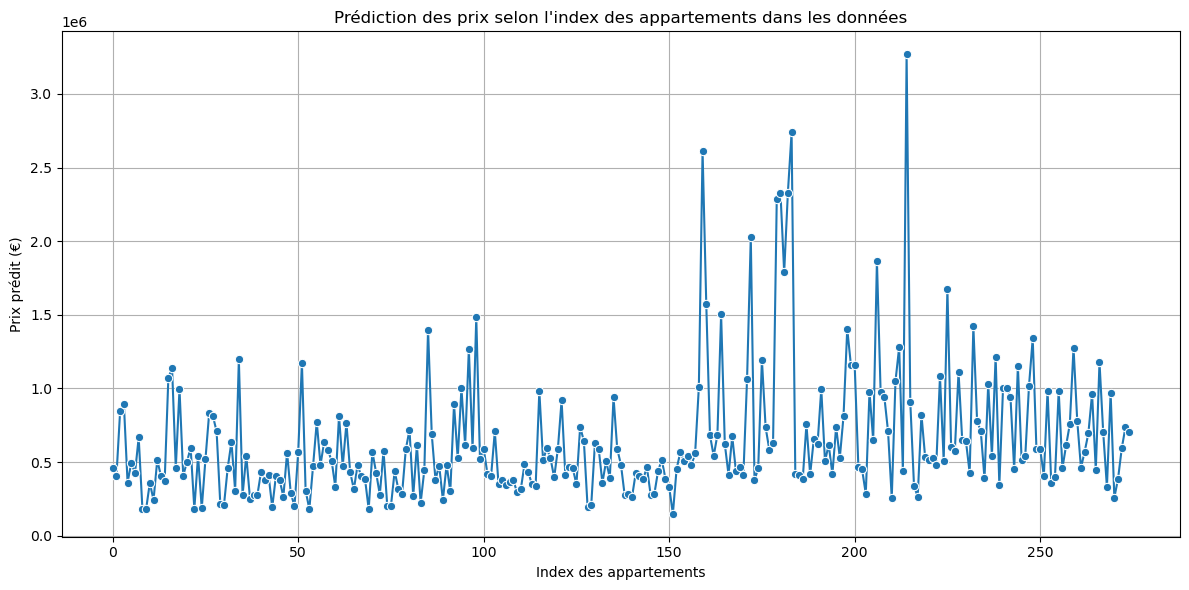

In [131]:
# graphique de la prédiction
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_actifs, x=df_actifs.index, y='prediction_prix', marker='o')

plt.title("Prédiction des prix selon l'index des appartements dans les données")
plt.xlabel('Index des appartements')
plt.ylabel('Prix prédit (€)')
plt.tight_layout()
plt.grid(True)
plt.show()

In [132]:
import plotly.express as px

fig = px.line(
    df_actifs,
    x=df_actifs.index,
    y="prediction_prix",
    title="Prédiction des prix selon l'index des appartements dans les données",
    labels={
        "index": "Index des appartements",
        "prediction_prix": "Prix prédit (€)"
    },
    markers=True  # ajoute les points comme dans sns.lineplot(marker='o')
)

fig.update_layout(
    xaxis_title="Index des appartements",
    yaxis_title="Prix prédit (€)",
    template="plotly_white"
)

fig.show()


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [133]:
#Valorisation du portefeuille sur le segment des particuliers
print('la valorisation du segment particulier est (en millions deuros):', df_actifs[df_actifs['code_type_local'] == 2]['prediction_prix'].sum().round(2))

la valorisation du segment particulier est (en millions deuros): 75771601.6


In [134]:
#Valorisation du portefeuille sur le segment corporate
print('la valorisation du segment corporate est (en millions deuros):', df_actifs[df_actifs['code_type_local'] == 4]['prediction_prix'].sum().round(2))

la valorisation du segment corporate est (en millions deuros): 101128486.29


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- La valorisation du segment corporate a la plus grande valorisation (98 614191,72€)
- Les limites de cette estimation peuvent être les suivantes : absence de certaines variables importante (exemple : surface au m2 et prix au m2, etc), impact des valeurs extrêmes (les biens du segment corporate peuvent être beuacoup plus grands et donc plus chers par rapport au segment particulier).

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [135]:
df_actifs_ml['prediction_prix'] = modelLR.predict(X2)

In [136]:
#On importe les données dans un dataframe
df_actifs_km = df_actifs_ml
# Conversion de la colonne 'code_type_local' en type str
df_actifs_km['code_type_local'] = df_actifs_km['code_type_local'].astype(str)
df_actifs_km

,code_postal,code_type_local,surface_reelle,year,month,day,prediction_prix
0,75001,2,25,2022,12,31,461365.664367
1,75003,2,22,2022,12,31,404249.291870
2,75003,2,65,2022,12,31,848099.952439
3,75008,2,74,2022,12,31,897448.824698
4,75008,2,22,2022,12,31,360699.188661
...,...,...,...,...,...,...,...
270,75019,4,16,2022,12,31,258210.462347
271,75002,4,15,2022,12,31,386656.008903
272,75002,4,35,2022,12,31,593098.176610
273,75002,4,49,2022,12,31,737607.694004


In [137]:
df_actifs_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   code_postal      275 non-null    int64  
 1   code_type_local  275 non-null    object 
 2   surface_reelle   275 non-null    int64  
 3   year             275 non-null    int32  
 4   month            275 non-null    int32  
 5   day              275 non-null    int32  
 6   prediction_prix  275 non-null    float64
dtypes: float64(1), int32(3), int64(2), object(1)
memory usage: 11.9+ KB


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [138]:
df_actifs_km['prix_m2'] = round(df_actifs_km['prediction_prix'] / df_actifs_km['surface_reelle'],2)
df_actifs_km = df_actifs_km.drop(columns=['prediction_prix', 'surface_reelle', 'year', 'month', 'day'])
df_actifs_km

,code_postal,code_type_local,prix_m2
0,75001,2,18454.63
1,75003,2,18374.97
2,75003,2,13047.69
3,75008,2,12127.69
4,75008,2,16395.42
...,...,...,...
270,75019,4,16138.15
271,75002,4,25777.07
272,75002,4,16945.66
273,75002,4,15053.22


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [139]:
from sklearn.cluster import KMeans
y3 = df_actifs_km.loc[:,'code_type_local']
display(y3)
X3 = df_actifs_km.loc[:,['code_postal', 'prix_m2']]
display(X3)


0      2
1      2
2      2
3      2
4      2
      ..
270    4
271    4
272    4
273    4
274    4
Name: code_type_local, Length: 275, dtype: object

,code_postal,prix_m2
0,75001,18454.63
1,75003,18374.97
2,75003,13047.69
3,75008,12127.69
4,75008,16395.42
...,...,...
270,75019,16138.15
271,75002,25777.07
272,75002,16945.66
273,75002,15053.22


In [140]:
# création des 2 groupes
modelKM = KMeans(n_clusters=2, random_state=0)
modelKM.fit(X3)


c:\Users\simon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\simon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



KMeans(n_clusters=2, random_state=0)

In [141]:
# Afficher le centre de chaque cluster obtenu
modelKM.cluster_centers_

## dans le résultat : 1ère colonne = code postal moyen, 2e colonne = prix au m² moyen


array([[75013.69058296, 12376.56309417],
       [75007.        , 19296.72538462]])

In [142]:
# Connaitre le centre du cluster le plus proche correspondant à chaque ligne de X
modelKM.labels_

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [143]:
# Distance entre les points les uns par rapport aux autres
modelKM.inertia_

990672051.1816815

Ici l'inertie est grande donc les clusters (groupes) sont bien séparé les uns des autres

In [144]:
# on évalue la qualité du clustering par l'ARI (Ajusted Rand Index)
from sklearn.metrics import adjusted_rand_score
y_true = y3
y_pred = modelKM.labels_
# Calcul de l'ARI
ari_score = adjusted_rand_score(y_true, y_pred)
print(f"ARI Score: {ari_score}")

ARI Score: 0.04847046953812127


- ARI = 1 : les clusters qu'on obtient correspondent aux vraies catégories (appartement vs local industriel)
- ARI = 0 : les clusters sont indépendants des vraies catégories
- ARI < 0 : les clusters sont aléatoires

Donc ici les clusters sont peu corrélés avec les catégories de biens (ARI = 0,047)

In [145]:
# On vérifie les données de la prédiction
df_actifs_km["cluster"] = modelKM.labels_
display(df_actifs_km.head())

,code_postal,code_type_local,prix_m2,cluster
0,75001,2,18454.63,1
1,75003,2,18374.97,1
2,75003,2,13047.69,0
3,75008,2,12127.69,0
4,75008,2,16395.42,1


In [146]:
# Pour voir la réparition des biens selon le cluster (2 = appartement et 1 = local industriel)
df_actifs_km.groupby("cluster")["code_type_local"].value_counts()

cluster  code_type_local
0        2                  136
         4                   87
1        4                   34
         2                   18
Name: count, dtype: int64

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [147]:
#On affiche les résultats
df_actifs_km["cluster_label"] = df_actifs_km["cluster"].replace({
    0: "Local industriel, commercial ou assimilé",
    1: "Appartement"
})
df_actifs_km.head()

,code_postal,code_type_local,prix_m2,cluster,cluster_label
0,75001,2,18454.63,1,Appartement
1,75003,2,18374.97,1,Appartement
2,75003,2,13047.69,0,"Local industriel, commercial ou assimilé"
3,75008,2,12127.69,0,"Local industriel, commercial ou assimilé"
4,75008,2,16395.42,1,Appartement


In [148]:
df_actifs["cluster"] = modelKM.labels_
df_actifs["cluster_label"] = df_actifs["cluster"].replace({
    0: "Local industriel, commercial ou assimilé",
    1: "Appartement"
})
df_actifs

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,prediction_prix,date,cluster,cluster_label
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227,461365.664367,2022-12-31,1,Appartement
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907,404249.291870,2022-12-31,1,Appartement
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318,848099.952439,2022-12-31,0,"Local industriel, commercial ou assimilé"
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893,897448.824698,2022-12-31,0,"Local industriel, commercial ou assimilé"
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490,360699.188661,2022-12-31,1,Appartement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,15,AV DE LAUMIERE,75019,75119,Paris 19e Arrondissement,14.12,4,Local industriel. commercial ou assimilé,16,0,2.380450,48.883397,258210.462347,2022-12-31,1,Appartement
271,3,RUE SAINT-JOSEPH,75002,75102,Paris 2e Arrondissement,14.10,4,Local industriel. commercial ou assimilé,15,0,2.345110,48.868196,386656.008903,2022-12-31,1,Appartement
272,2,RUE GRETRY,75002,75102,Paris 2e Arrondissement,34.85,4,Local industriel. commercial ou assimilé,35,0,2.337593,48.870514,593098.176610,2022-12-31,1,Appartement
273,115,RUE D ABOUKIR,75002,75102,Paris 2e Arrondissement,41.61,4,Local industriel. commercial ou assimilé,49,0,2.349804,48.868784,737607.694004,2022-12-31,0,"Local industriel, commercial ou assimilé"


In [149]:
df_actifs['prix_m2'] = round(df_actifs['prediction_prix'] / df_actifs['surface_reelle_bati'],2)
df_actifs

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,prediction_prix,date,cluster,cluster_label,prix_m2
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227,461365.664367,2022-12-31,1,Appartement,18454.63
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907,404249.291870,2022-12-31,1,Appartement,18374.97
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318,848099.952439,2022-12-31,0,"Local industriel, commercial ou assimilé",13047.69
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893,897448.824698,2022-12-31,0,"Local industriel, commercial ou assimilé",12127.69
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490,360699.188661,2022-12-31,1,Appartement,16395.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,15,AV DE LAUMIERE,75019,75119,Paris 19e Arrondissement,14.12,4,Local industriel. commercial ou assimilé,16,0,2.380450,48.883397,258210.462347,2022-12-31,1,Appartement,16138.15
271,3,RUE SAINT-JOSEPH,75002,75102,Paris 2e Arrondissement,14.10,4,Local industriel. commercial ou assimilé,15,0,2.345110,48.868196,386656.008903,2022-12-31,1,Appartement,25777.07
272,2,RUE GRETRY,75002,75102,Paris 2e Arrondissement,34.85,4,Local industriel. commercial ou assimilé,35,0,2.337593,48.870514,593098.176610,2022-12-31,1,Appartement,16945.66
273,115,RUE D ABOUKIR,75002,75102,Paris 2e Arrondissement,41.61,4,Local industriel. commercial ou assimilé,49,0,2.349804,48.868784,737607.694004,2022-12-31,0,"Local industriel, commercial ou assimilé",15053.22


In [150]:
print('la valorisation du segment particulier est (en millions deuros):', df_actifs[df_actifs['cluster']==1]['prix_m2'].mean().round(2))

la valorisation du segment particulier est (en millions deuros): 19296.73


In [151]:
print('la valorisation du segment corporate est (en millions deuros):', df_actifs[df_actifs['cluster'] == 0]['prix_m2'].mean().round(2))

la valorisation du segment corporate est (en millions deuros): 12376.56


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- Conclusions :
Les 2 groupes ont bien été formés.
Le centre des clusters montrent une différence dans les prix au m² : appartement = environ 19 619€/m², local industriel = environ 12 561€/m²
- Les limites : peu de variables explicatives (uniquement code postal et prix au m²), on utilise le code postal comme variable numérique alors que c'est en réalité une variable catégorielle